# EDA of suicides in India (from 2001-2012)

In [1]:
#!pip install pandas
import numpy as np
import pandas as pd


In [2]:
s_data=pd.read_csv("../input/Suicides in India 2001-2012.csv")


In [3]:
s_data.info() #looking at the data types
#Checking for missing data
#It looks like there are no null values in the dataset.
print("\n")
print(s_data.isnull().sum()) #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


In [4]:
#Taking a look at the data
s_data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


    It seems that the data has been straified by the Type Code.
    Separating it using the categories in type code makes sense.

In [5]:
#Taking a look at the counts of 'Type_code'
s_data['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [6]:
s_data['State'].value_counts()
#The totals have been already included in the dataset, it makes sense to store it as a separate df.

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Haryana              6790
Chhattisgarh         6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (States)        312
Total (All India)     312
Total (Uts)           312
Name: State,

In [7]:
#Keeping the totals in a separate df
totals=[item for item in s_data['State'] if "Total" in item]
totals=list(set(totals)) #To extract unique values in the list
s_totals=s_data[s_data['State'].isin(totals)] #storing a subsetted df in s_totals

In [8]:
#Checking if the overall values add up
pd.pivot_table(s_totals,index=['State','Type_code'],values='Total',aggfunc = np.sum)

Total
State             Type_code                
Total (All India) Education_Status  1455931
                  Social_Status     1455931
Total (States)    Education_Status  1429013
                  Social_Status     1429013
Total (Uts)       Education_Status    26918
                  Social_Status       26918

So suprisingly all the All India and state totals are adding up.
Let's check if it's the same for the state level and UT level data.

In [9]:
#Checking if the overall values add up for the states
s_states=s_data[~s_data['State'].isin(totals)] #storing the state and UT data separately
pd.pivot_table(s_states,index=['State','Type_code'],values='Total',aggfunc=np.sum)

Total
State             Type_code                   
A & N Islands     Causes                  1623
                  Education_Status        1623
                  Means_adopted           1623
                  Professional_Profile    1617
                  Social_Status           1623
Andhra Pradesh    Causes                162820
                  Education_Status      162820
                  Means_adopted         162820
                  Professional_Profile  162779
                  Social_Status         162820
Arunachal Pradesh Causes                  1328
                  Education_Status        1328
                  Means_adopted           1328
                  Professional_Profile    1321
                  Social_Status           1328
Assam             Causes                 34469
                  Education_Status       34469
                  Means_adopted          34469
                  Professional_Profile   34400
                  Social_Status          34469
Bihar             Causes                  9245
                  Education_Status        9245
                  Means_adopted           9245
                  Professional_Profile    9234
                  Social_Status           9245
Chandigarh        Causes                  1034
                  Education_Status        1034
                  Means_adopted           1034
                  Professional_Profile    1028
                  Social_Status           1034
...                                        ...
Sikkim            Causes                  1924
                  Education_Status        1924
                  Means_adopted           1924
                  Professional_Profile    1910
                  Social_Status           1924
Tamil Nadu        Causes                163813
                  Education_Status      163813
                  Means_adopted         163813
                  Professional_Profile  163439
                  Social_Status         163813
Tripura           Causes                  9194
                  Education_Status        9194
                  Means_adopted           9194
                  Professional_Profile    9189
                  Social_Status           9194
Uttar Pradesh     Causes                 46680
                  Education_Status       46680
                  Means_adopted          46680
                  Professional_Profile   46632
                  Social_Status          46680
Uttarakhand       Causes                  3702
                  Education_Status        3702
                  Means_adopted           3702
                  Professional_Profile    3688
                  Social_Status           3702
West Bengal       Causes                161030
                  Education_Status      175987
                  Means_adopted         175987
                  Professional_Profile  160945
                  Social_Status         175987

[175 rows x 1 columns]

In [10]:
pd.pivot_table(s_states,index='Type_code',values='Total',aggfunc=np.sum)

,Total
Type_code,
Causes,1440974
Education_Status,1455931
Means_adopted,1455931
Professional_Profile,1439243
Social_Status,1455931


So from the above results it's visible that the data is incomplete however, the number of inconsitencies in the data are fairly low and occur only in two Type_codes namely - 'Causes' and 'Professional Profile'.
So its fairly safe to use the data as is.

# Visualizations

Lets start looking for trends in the data.
Looking for the total number of suicides by year.
Looking at each of the type_codes to identify the areas where suicide is the most common (this can be useful in order to prevent suicides in the future)

In [11]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [12]:
#The data repeats itself in the df so we won't plot the entire data just one of the type_code should do.

In [13]:
df=s_totals[s_totals['State']=='Total (All India)'] #Storing All India Data separately
#Storing the totals for each year as a separate df
total_yearly=pd.pivot_table(df[df['Type_code']=='Education_Status'],values='Total',index='Year',aggfunc=np.sum)

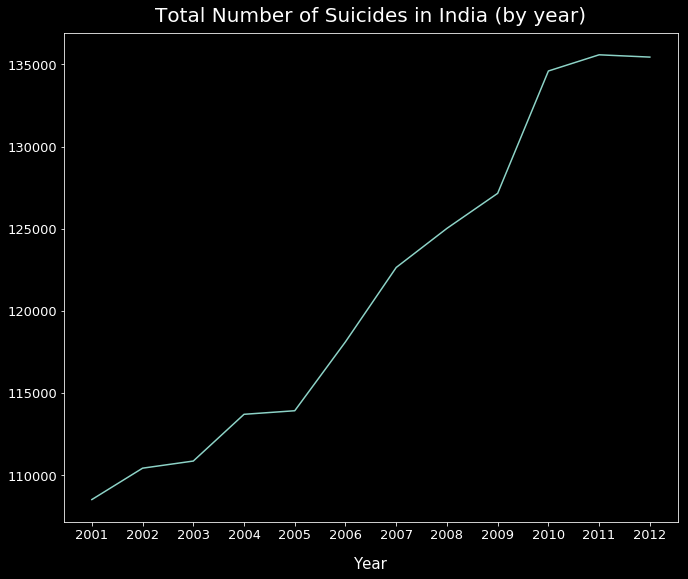

In [14]:
#Plotting the total number of suicides per year in India
plt.figure(figsize=(11,9))
plt.plot(total_yearly)
plt.title("Total Number of Suicides in India (by year)", fontsize=20, y=1.01)
plt.xticks(total_yearly.index)
plt.tick_params(labelsize=13)
plt.xlabel("Year", fontsize=15, labelpad=15)
plt.show()

# Observations
Looking at the graph it's pretty obvious that the nuber of suicides have been steadily increasing over the years. However, in the most recent years 2010-2012 this trend has slowed down in fact, we can see a very slight downward trend fro 2011 to 2012.

Let's stratify this graph by education status and social status (also gender)

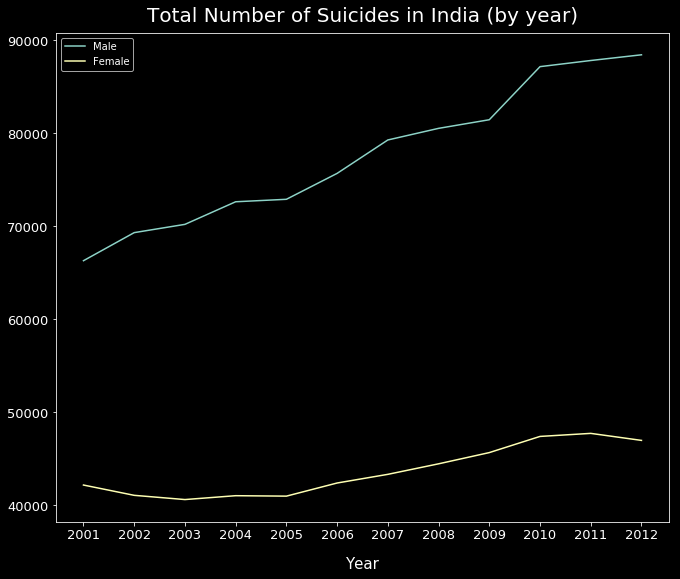

In [15]:
#Getting totals per year by gender
total_gender=pd.pivot_table(df[df['Type_code']=='Education_Status'],values='Total',index=['Year'],columns=['Gender'],aggfunc=np.sum)
plt.figure(figsize=(11,9))
plt.plot(total_gender['Male'], label="Male")
plt.plot(total_gender['Female'], label="Female")
plt.legend(loc='best')
plt.title("Total Number of Suicides in India (by year)", fontsize=20, y=1.01)
plt.xticks(total_gender.index)
plt.tick_params(labelsize=13)
plt.xlabel("Year", fontsize=15, labelpad=15)
plt.show()

# Gender matters
So it's obvious from the above figure that there is an overwhelming disparity in the number of suicides between men and women. The number of men outnumber the number of women significantly.
We can deep-dive into the subcategories of each gender trying to identify things which can further affect both men and women.




In [16]:
total_edu_female_year=pd.pivot_table(df[(df['Type_code']=='Education_Status') & (df['Gender']=='Female')],values='Total',index=['Year'],columns=['Type'],aggfunc=np.sum)
total_edu_male_year=pd.pivot_table(df[(df['Type_code']=='Education_Status') & (df['Gender']=='Male')],values='Total',index=['Year'],columns=['Type'],aggfunc=np.sum)

total_edu_female=pd.pivot_table(df[(df['Type_code']=='Education_Status') & (df['Gender']=='Female')],values='Total',index=['Type'],aggfunc=np.sum)
total_edu_male=pd.pivot_table(df[(df['Type_code']=='Education_Status') & (df['Gender']=='Male')],values='Total',index=['Type'],aggfunc=np.sum)

In [17]:
#Sorting values in descending order
total_edu_male.sort_values(by='Total',ascending=False,inplace=True)
total_edu_female.sort_values(by='Total',ascending=False,inplace=True)
#Changing indices to make the graph look better
as_list = total_edu_male.index.tolist()
as_list[4] = 'Hr.Secondary'
as_list[3]='Secondary'
total_edu_male.index = as_list

as_list = total_edu_female.index.tolist()
as_list[4] = 'Hr.Secondary'
as_list[3]='Secondary'
total_edu_female.index = as_list


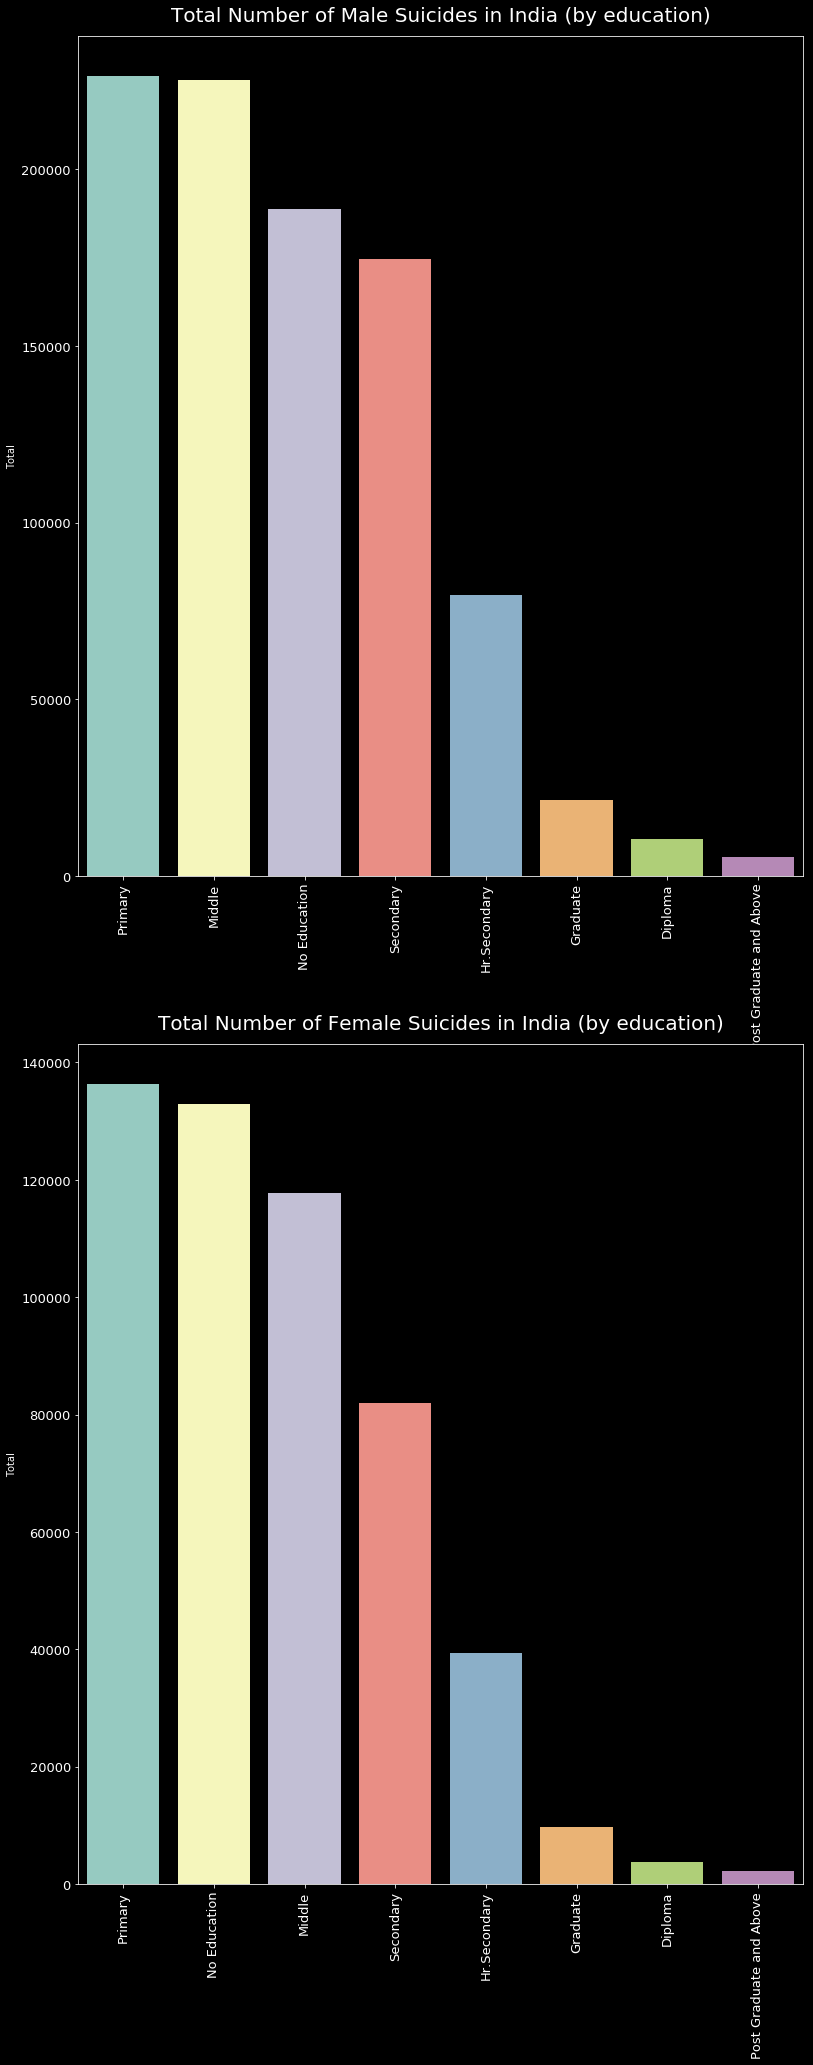

In [18]:
plt.figure(figsize=(13,34))

plt.subplot(2,1,1)
sns.barplot(x=total_edu_male.index,y=total_edu_male.Total)
plt.xticks(rotation='vertical')
plt.title("Total Number of Male Suicides in India (by education)", fontsize=20, y=1.01)
plt.tick_params(labelsize=13)

plt.subplot(2,1,2)
sns.barplot(x=total_edu_female.index,y=total_edu_female.Total)
plt.xticks(rotation='vertical')
plt.title("Total Number of Female Suicides in India (by education)", fontsize=20, y=1.01)
plt.tick_params(labelsize=13)



# Education Matters
So we can see that the level of education in both males and females have a significant impact on the number of suicides. Generally speaking lower the education level of a person more is the probability that he/she commits suicide (with the exception being 'No Education'). 

With regards to 'No Education' we can hypothesize that it's not the highest because there are quite a lot of uneducated people in India who still have a viable means of earning like farmers or labourers.

There is a drastic drop off at 2 points, at 'Higher Secondary' and at 'Graduate' level.
From these observations it's safe to assume that people with higher education levels are likely to be employed which makes them less susceptible to commit suicide.

Let's take a look at how the social status matters.


In [19]:
total_social_female=pd.pivot_table(df[(df['Type_code']=='Social_Status') & (df['Gender']=='Female')],values='Total',index=['Type'],aggfunc=np.sum)
total_social_male=pd.pivot_table(df[(df['Type_code']=='Social_Status') & (df['Gender']=='Male')],values='Total',index=['Type'],aggfunc=np.sum)

In [20]:
#Sorting values in descending order
total_social_male.sort_values(by='Total',ascending=False,inplace=True)
total_social_female.sort_values(by='Total',ascending=False,inplace=True)

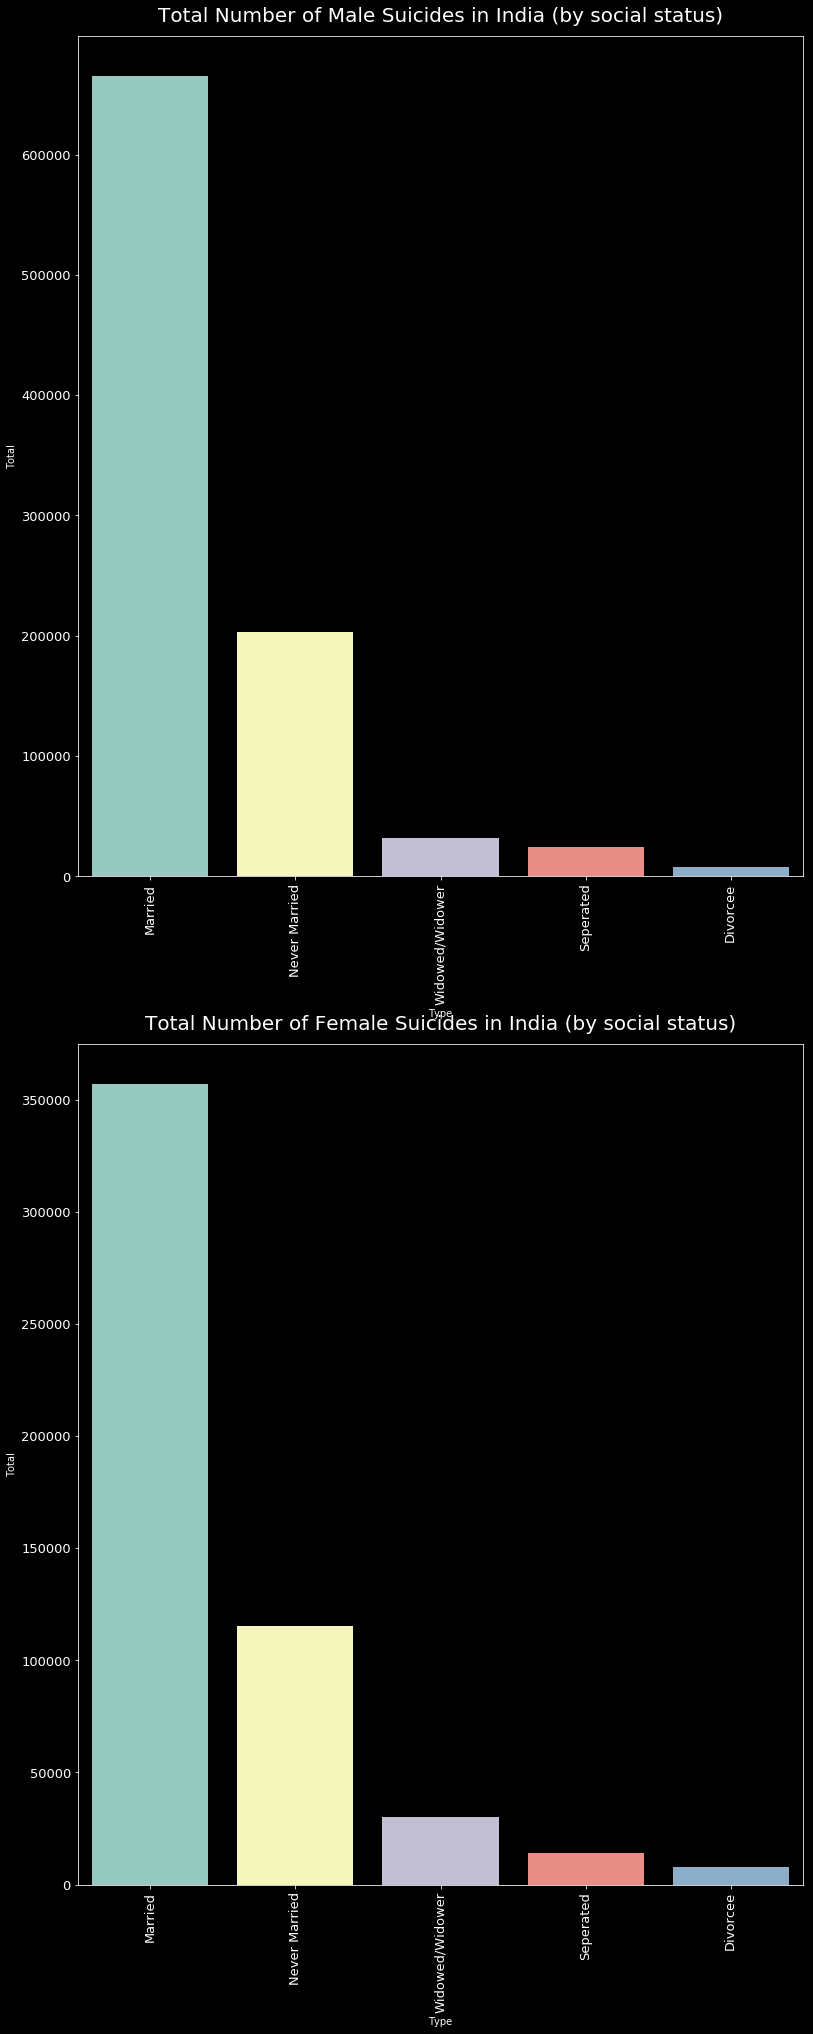

In [21]:
plt.figure(figsize=(13,34))

plt.subplot(2,1,1)
sns.barplot(x=total_social_male.index,y=total_social_male.Total)
plt.xticks(rotation='vertical')
plt.title("Total Number of Male Suicides in India (by social status)", fontsize=20, y=1.01)
plt.tick_params(labelsize=13)

plt.subplot(2,1,2)
sns.barplot(x=total_social_female.index,y=total_social_female.Total)
plt.xticks(rotation='vertical')
plt.title("Total Number of Female Suicides in India (by social status)", fontsize=20, y=1.01)
plt.tick_params(labelsize=13)


Suicide seems to be more common in married men and women however it cannot be called as a reason for suicide since most men/women in their mid/late 20s are married in India hence this number will be higher and can probably not be regarded as a cause. Further investigation required.

# Other Factors
Lets continue with our analysis and see what are the other factors which might be an influence on suicides in India. 

In [22]:
#Let's list the different type codes we have in the data
s_states['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: Type_code, dtype: int64

We have already taken a look at the education and the social status.
Let's take a look at the causes and the professional profile next.

In [23]:
#Let's first remove the age group=0-100 from the dataset since it will double count the data once 
#we add all the totals up
#Keeping the totals in a separate df
rm=[item for item in s_states['Age_group'] if "0-100" in item]
rm=list(set(rm)) #To extract unique values in the list
s_states=s_states[~s_states['Age_group'].isin(rm)] #storing a subsetted df in s_totals


In [24]:
#Taking a look at the causes. 
#It seems that a bit of cleaning is required in this case, the last two types are basically the same. 
s_states[s_states['Type_code']=="Causes"].Type.value_counts()

Divorce                                           4200
Ideological Causes/Hero Worshipping               4200
Unemployment                                      4200
Illegitimate Pregnancy                            4200
Dowry Dispute                                     4200
Fall in Social Reputation                         4200
Failure in Examination                            4200
Illness (Aids/STD)                                4200
Cancer                                            4200
Causes Not known                                  4200
Paralysis                                         4200
Professional/Career Problem                       4200
Cancellation/Non-Settlement of Marriage           4200
Property Dispute                                  4200
Physical Abuse (Rape/Incest Etc.)                 4200
Other Causes (Please Specity)                     4200
Other Prolonged Illness                           4200
Insanity/Mental Illness                           4200
Love Affai

In [25]:
#Storing the causes as a pivot_table
s_states_causes=pd.pivot_table(s_states[s_states['Type_code']=="Causes"],index='Type',values='Total',aggfunc=np.sum)
s_states_causes.sort_values(by='Total',ascending=False,inplace=True)
s_states_causes #Taking a look at the leading causes for suicide

,Total
Type,
Family Problems,341952
Causes Not known,237069
Other Causes (Please Specity),216050
Other Prolonged Illness,194565
Insanity/Mental Illness,94229
Love Affairs,45039
Bankruptcy or Sudden change in Economic,32755
Poverty,32684
Dowry Dispute,31970


In [26]:
#Storing the professional_profile as a pivot_table
s_states_prof=pd.pivot_table(s_states[s_states['Type_code']=="Professional_Profile"],index='Type',values='Total',aggfunc=np.sum)
s_states_prof.sort_values(by='Total',ascending=False,inplace=True)
s_states_prof #Taking a look at the leading causes for suicide

,Total
Type,
Others (Please Specify),469147
House Wife,285243
Farming/Agriculture Activity,197923
Service (Private),115472
Unemployed,114374
Self-employed (Business activity),78112
Student,74323
Professional Activity,39204
Public Sector Undertaking,30786


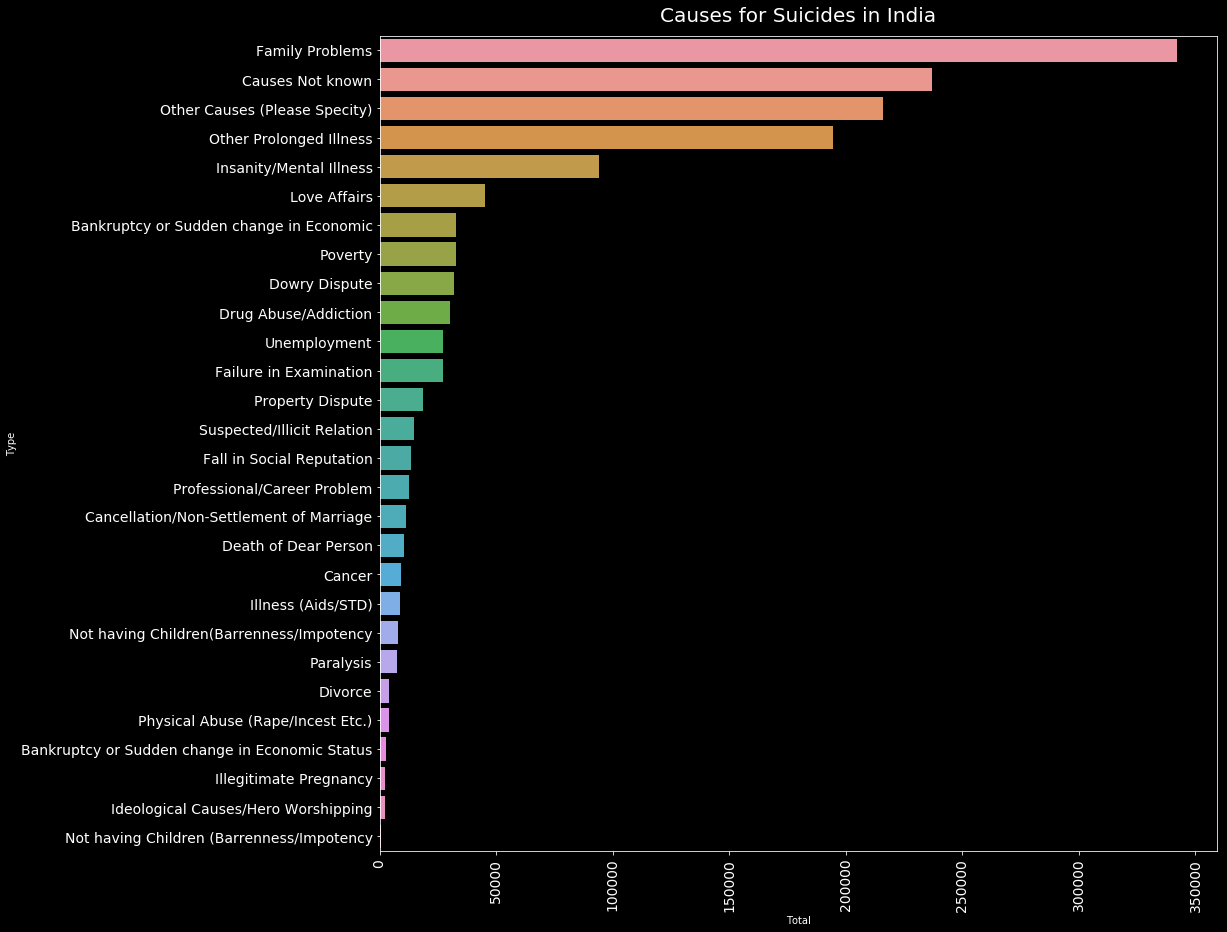

In [27]:
#Plotting causes
plt.figure(figsize=(15,15))
sns.barplot(y=s_states_causes.index,x=s_states_causes.Total)
plt.xticks(rotation='vertical')
plt.title("Causes for Suicides in India", fontsize=20, y=1.01)
plt.tick_params(labelsize=14)

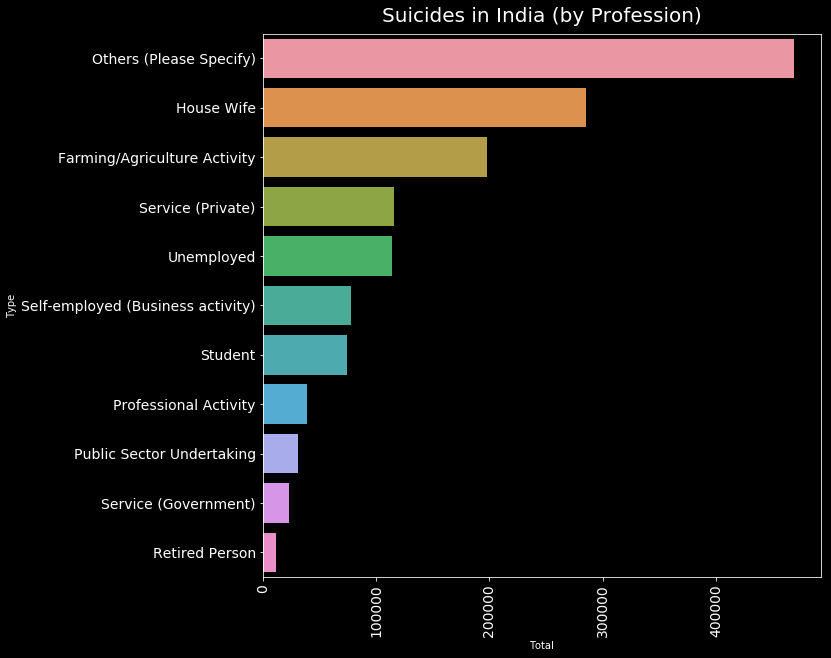

In [28]:
#Plotting professional profile
plt.figure(figsize=(10,10))
sns.barplot(y=s_states_prof.index,x=s_states_prof.Total)
plt.xticks(rotation='vertical')
plt.title("Suicides in India (by Profession)", fontsize=20, y=1.01)
plt.tick_params(labelsize=14)

# Conclusions
### Causes-
Looking at the above graph its apparent that most suicides occur due to 'Family Problems' however it's too broad of a category to consider a single cause. Moreover most causes are either unknown or categorized as 'other causes'. This is immediately followed by chronic illnesses.

### Profession- 
Again in this case most of the suicides have been classified into the 'others' category. This means that either their profession was unknown or there were too many unique professions to be listed in the df.
After that the three most common professions where most suicides occur are -
-Housewife
-Farmers
-Service(Private)

In [29]:
#Let's take a look at the states where most suicides occur - 
s_states_totals=pd.pivot_table(s_states[s_states['Type_code']=="Causes"],index='State',values='Total',aggfunc=np.sum)
s_states_totals.sort_values(by='Total',ascending=False,inplace=True)
s_states_totals

,Total
State,
Maharashtra,180389
Tamil Nadu,163813
Andhra Pradesh,162820
West Bengal,161030
Karnataka,146965
Kerala,107936
Madhya Pradesh,90307
Gujarat,66177
Chhattisgarh,60495


Looking at the suicides across states and UTs it looks like the top states include the ones which have a concentration of both metropolitan areas as well as villages and are amongst the larger states of India.

# Final Thoughts
I have only covered a few basic things, there are many more things which can be investigated using this data depending on the questions asked. 
We can further deepdive into the reasons for suicides in each state.
We can look at what the most common metod of suicide (in order to see how we can prevent the same)
We can merge this data with other datasets to confirm some of our hypothesis.
We can further stratify the data by year and gender to see if any more patterns are visible.